In [2]:
# importation des librairies et des données

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("mushrooms.csv", sep = ',')
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [3]:
# Encodage des données en chiffre

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
for col in data.columns :
    data[col] = labelencoder.fit_transform(data[col])

print(data.head(5))

   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0         

In [4]:
# Séparartion des données en training et testing set 

from sklearn.model_selection import train_test_split

# récupération des variables explicatives ( features)

X = data.iloc[:,1:23]
y = data.iloc[:,0]

xtrain, xtest, ytrain, ytest = train_test_split(X, y,
                                               test_size = 0.3)

In [5]:
## Modelisation 

In [6]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

lr = LogisticRegression(solver = "liblinear")

In [9]:
# Ajustement sur les données d'entrainement
lr = lr.fit(xtrain,ytrain)

In [11]:
# prediction sur les données de test
ypred = lr.predict(xtest)
print(ypred)

[0 0 1 ... 1 1 1]


In [12]:
# Probabilté de prediction sur la classe positive
yprob = lr.predict_proba(xtest)[:,1]
print(yprob)

[0.0010885  0.1130359  0.99909023 ... 0.94310143 0.55332181 0.96484911]


In [15]:
#  Sensibility, specificity and thresold
fpr, tpr, thr = roc_curve(ytest, yprob)

In [16]:
# AUROC

roc_auc = auc(fpr,tpr)
print(roc_auc)

0.9825339391502804


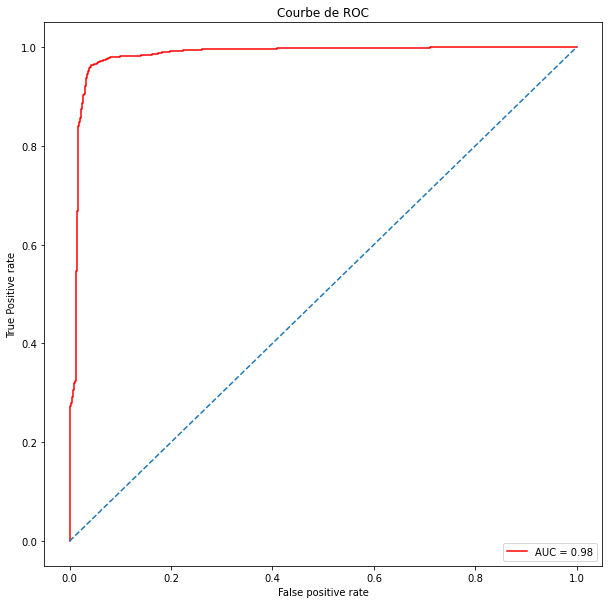

In [20]:
# Courbe de ROC
plt.figure(figsize=(10,10))
plt.title("Courbe de ROC")
plt.plot(fpr, tpr, color = 'red',
        label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.show()

In [22]:
# Application de l'algo des SVM

from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [25]:
# Instance de SVM

svm = LinearSVC()

# Grille d'hyperparametres
params = {'C' : np.logspace(-3, 3, 7)}

# Validation croisée
grid = GridSearchCV(lr, params, cv = 10)

# Ajustement sur les données d'entrainement
grid.fit(xtrain,ytrain)

# Affichage des meilleurs parametres
print(grid.best_params_)

{'C': 1000.0}


In [27]:
# Evaluation des performances du modèle
from sklearn.metrics import roc_curve, auc
fpr, tpr, thr = roc_curve(ytest, yprob)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9825339391502804
